Handwritten digit recognition using pythorch CNN

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [7]:
train_data = datasets.MNIST(root = 'data',train = True, transform = ToTensor(),download = True)
test_data = datasets.MNIST(root = 'data',train = False, transform = ToTensor(),download = True)


In [8]:
display(train_data)
display(test_data)
display(train_data.data.shape)
display(train_data.targets)



Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

torch.Size([60000, 28, 28])

tensor([5, 0, 4,  ..., 5, 6, 8])

Provide dataloader to train in batches

In [9]:
from torch.utils.data import DataLoader

loaders =  {
    'train' : DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test': DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1)        
            }
loaders



{'train': <torch.utils.data.dataloader.DataLoader at 0x7f5c625aeb10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f5c625af830>}

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,10,5)
        self.conv2 = nn.Conv2d(10,20,5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward (self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2 )) 
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x, dim =1 )

 


In [11]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(),lr=0.001)
print(model.parameters)

loss_fn = nn.CrossEntropyLoss()



<bound method Module.parameters of CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)>


In [12]:

def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders['train']):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"train epoch is:{epoch}[{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100.*batch_idx / len(loaders['train']):.0}%)]\t({loss.item():.6})")
            

In [13]:
def test():
    model.eval()
    test_loss = 0 
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device),target.to(device)
            output = model(data)
            test_loss += loss_fn(output,target).item()
            pred = output.argmax(dim=1, keepdim= True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f'\n Test set: Average Loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)')


Start the training

In [14]:
for epoch  in range (1,11):
    train(epoch)
    test()


train epoch is:1[0/60000 (0e+00%)]	(2.30204)
train epoch is:1[2000/60000 (3e+00%)]	(2.29499)
train epoch is:1[4000/60000 (7e+00%)]	(2.1677)
train epoch is:1[6000/60000 (1e+01%)]	(2.04567)
train epoch is:1[8000/60000 (1e+01%)]	(1.92966)
train epoch is:1[10000/60000 (2e+01%)]	(1.85995)
train epoch is:1[12000/60000 (2e+01%)]	(1.76532)
train epoch is:1[14000/60000 (2e+01%)]	(1.83615)
train epoch is:1[16000/60000 (3e+01%)]	(1.69491)
train epoch is:1[18000/60000 (3e+01%)]	(1.79389)
train epoch is:1[20000/60000 (3e+01%)]	(1.69658)
train epoch is:1[22000/60000 (4e+01%)]	(1.74043)
train epoch is:1[24000/60000 (4e+01%)]	(1.71374)
train epoch is:1[26000/60000 (4e+01%)]	(1.71352)
train epoch is:1[28000/60000 (5e+01%)]	(1.61829)
train epoch is:1[30000/60000 (5e+01%)]	(1.59364)
train epoch is:1[32000/60000 (5e+01%)]	(1.60663)
train epoch is:1[34000/60000 (6e+01%)]	(1.60711)
train epoch is:1[36000/60000 (6e+01%)]	(1.57311)
train epoch is:1[38000/60000 (6e+01%)]	(1.5807)
train epoch is:1[40000/60000 (

In [18]:

import torch
try: 
    torch.save(model.state_dict(), "mnist_cnn.pth") 
    print("Model saved successfully") 
except Exception as e: 
    print(f"Error saving model: {e}")


Model saved successfully


In [19]:
try: 
    model.load_state_dict(torch.load("mnist_cnn.pth"))
    print("Model loaded successfully") 
except Exception as e: 
    print(f"Error loading model: {e}")


Model loaded successfully


prediction :8


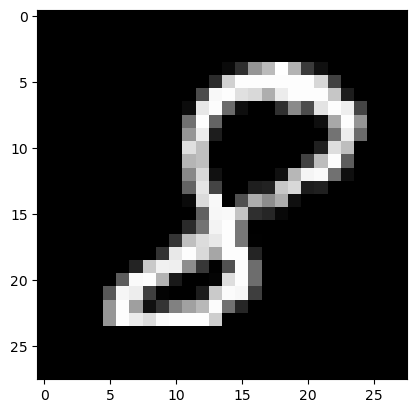

In [ ]:
from random import randint
import random
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[random.randint(0,1000)]

data = data.unsqueeze(0).to(device)

output= model(data)

prediction = output.argmax(dim = 1, keepdim= True).item()

print (f'prediction :{prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
